# Imports

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
import re
from sklearn.cluster import KMeans

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
import warnings
warnings.filterwarnings("ignore")

# Load in data

In [ ]:
! wget https://raw.githubusercontent.com/clairemai02/data144/main/reviews.csv
reviews = pd.read_csv("reviews.csv")

--2023-12-06 01:59:39--  https://raw.githubusercontent.com/clairemai02/data144/main/reviews.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6602939 (6.3M) [text/plain]
Saving to: ‘reviews.csv’

reviews.csv         100%[===================>]   6.30M  --.-KB/s    in 0.1s    

2023-12-06 01:59:39 (64.1 MB/s) - ‘reviews.csv’ saved [6602939/6602939]



In [ ]:
reviews.head()

,brand,key,author,date,stars,title,helpful_yes,helpful_no,text,taste,ingredients,texture,likes
0,bj,0_bj,Ilovebennjerry,2017-04-15,3,Not enough brownies!,10.0,3.0,"Super good, don't get me wrong. But I came for...",NaN,NaN,NaN,NaN
1,bj,0_bj,Sweettooth909,2020-01-05,5,I’m OBSESSED with this pint!,3.0,0.0,I decided to try it out although I’m not a hug...,NaN,NaN,NaN,NaN
2,bj,0_bj,LaTanga71,2018-04-26,3,My favorite...More Caramel Please,5.0,2.0,My caramel core begins to disappear about half...,NaN,NaN,NaN,NaN
3,bj,0_bj,chicago220,2018-01-14,5,Obsessed!!!,24.0,1.0,Why are people complaining about the blonde br...,NaN,NaN,NaN,NaN
4,bj,0_bj,Kassidyk,2020-07-24,1,Worst Ice Cream Ever!,1.0,5.0,This ice cream is worst ice cream I’ve ever ta...,NaN,NaN,NaN,NaN


In [ ]:
! wget https://raw.githubusercontent.com/clairemai02/data144/main/products.csv
products = pd.read_csv("products.csv")

--2023-12-06 01:59:39--  https://raw.githubusercontent.com/clairemai02/data144/main/products.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 178240 (174K) [text/plain]
Saving to: ‘products.csv’

products.csv        100%[===================>] 174.06K  --.-KB/s    in 0.03s   

2023-12-06 01:59:39 (4.91 MB/s) - ‘products.csv’ saved [178240/178240]



In [ ]:
products.head()

,brand,key,name,subhead,description,rating,rating_count,ingredients
0,bj,0_bj,Salted Caramel Core,Sweet Cream Ice Cream with Blonde Brownies & a...,Find your way to the ultimate ice cream experi...,3.7,208,"CREAM, SKIM MILK, LIQUID SUGAR (SUGAR, WATER),..."
1,bj,1_bj,Netflix & Chilll'd™,Peanut Butter Ice Cream with Sweet & Salty Pre...,There’s something for everyone to watch on Net...,4.0,127,"CREAM, SKIM MILK, LIQUID SUGAR (SUGAR, WATER),..."
2,bj,2_bj,Chip Happens,A Cold Mess of Chocolate Ice Cream with Fudge ...,Sometimes “chip” happens and everything’s a me...,4.7,130,"CREAM, LIQUID SUGAR (SUGAR, WATER), SKIM MILK,..."
3,bj,3_bj,Cannoli,Mascarpone Ice Cream with Fudge-Covered Pastry...,As a Limited Batch that captured the rapture o...,3.6,70,"CREAM, SKIM MILK, LIQUID SUGAR (SUGAR, WATER),..."
4,bj,4_bj,Gimme S’more!™,Toasted Marshmallow Ice Cream with Chocolate C...,It’s a gimme: there’s always room for s’more. ...,4.5,281,"CREAM, SKIM MILK, WATER, LIQUID SUGAR (SUGAR, ..."


# Prelim data exploring and cleaning

In [ ]:
reviews.isna().sum() # drop the last 4 columns since most values are null

brand              0
key                0
author           800
date               0
stars              0
title           5399
helpful_yes        0
helpful_no         0
text               0
taste          17409
ingredients    17409
texture        17409
likes          19379
dtype: int64

In [ ]:
reviews = reviews.drop(labels=["taste", "ingredients", "texture", "likes"], axis=1)
reviews.head()

,brand,key,author,date,stars,title,helpful_yes,helpful_no,text
0,bj,0_bj,Ilovebennjerry,2017-04-15,3,Not enough brownies!,10.0,3.0,"Super good, don't get me wrong. But I came for..."
1,bj,0_bj,Sweettooth909,2020-01-05,5,I’m OBSESSED with this pint!,3.0,0.0,I decided to try it out although I’m not a hug...
2,bj,0_bj,LaTanga71,2018-04-26,3,My favorite...More Caramel Please,5.0,2.0,My caramel core begins to disappear about half...
3,bj,0_bj,chicago220,2018-01-14,5,Obsessed!!!,24.0,1.0,Why are people complaining about the blonde br...
4,bj,0_bj,Kassidyk,2020-07-24,1,Worst Ice Cream Ever!,1.0,5.0,This ice cream is worst ice cream I’ve ever ta...


In [ ]:
reviews.describe() # some outliers in helpful_yes and helpful_no, could be interesting to explore them

,stars,helpful_yes,helpful_no
count,21674.000000,21674.000000,21674.000000
mean,4.223955,1.364815,0.443019
std,1.384121,8.234123,2.568762
min,1.000000,0.000000,0.000000
25%,4.000000,0.000000,0.000000
50%,5.000000,0.000000,0.000000
75%,5.000000,1.000000,0.000000
max,5.000000,421.000000,121.000000


In [ ]:
reviews.groupby("brand").count() #bj has about twice as many reviews as talenti

,key,author,date,stars,title,helpful_yes,helpful_no,text
brand,,,,,,,,
bj,7943,7659,7943,7943,5332,7943,7943,7943
breyers,5007,5007,5007,5007,3062,5007,5007,5007
hd,4655,4221,4655,4655,4265,4655,4655,4655
talenti,4069,3987,4069,4069,3616,4069,4069,4069


<Axes: xlabel='stars', ylabel='Count'>

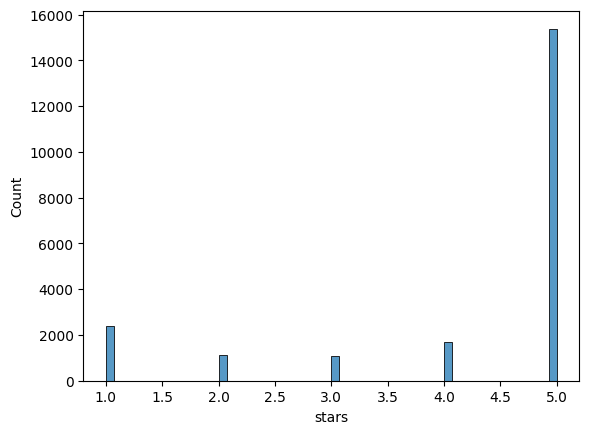

In [ ]:
sns.histplot(reviews["stars"]) # majority 5 stars

In [ ]:
reviews["helpful_yes"].unique() #should subset out the reviews with >100 people who found it helpful

array([ 10.,   3.,   5.,  24.,   1.,   4.,   8.,   0.,  21.,   2.,  11.,
        12.,   9.,   6.,  22.,  31.,  17.,  16.,   7.,  27.,  20.,  42.,
        13.,  14.,  18.,  19.,  34.,  28.,  15.,  51.,  26.,  23.,  54.,
        64.,  79.,  45.,  38.,  32.,  36., 105.,  29.,  33.,  37.,  44.,
        47.,  43.,  46.,  49.,  50.,  69.,  25.,  59.,  35.,  41., 222.,
       200., 167., 128., 189., 204., 198., 210., 292., 248., 259., 249.,
       232., 224., 145., 129., 226., 132.,  66.,  57.,  53.,  55.,  84.,
        63.,  58.,  39.,  67.,  52.,  81.,  94.,  72., 421., 141.,  75.,
        40.,  73.,  30.,  48., 148.])

In [ ]:
most_helpful = reviews[reviews["helpful_yes"] > 100]
most_helpful.head()

,brand,key,author,date,stars,title,helpful_yes,helpful_no,text
4959,bj,30_bj,clouds513,2019-07-31,5,"The best flavor, anyone can fight me on this.",105.0,0.0,I've been buying Milk & Cookies for i don't ev...
10667,hd,38_hd,Rookie,2019-07-06,1,Nestle ruined Haagendazs,222.0,6.0,"Mint chip with skim milk, corn syrup, corn sta..."
10668,hd,38_hd,Tommy,2019-03-12,2,"A step,in the wrong direction, recipe-wise.",200.0,3.0,So disappointed to see the inclusion of corn s...
10669,hd,38_hd,Eveny,2018-07-08,3,Corn syrup,167.0,0.0,"While the flavor was fine (not great), the lis..."
10670,hd,38_hd,MetalGuy82,2020-01-29,1,What Happened To The Mint Chip Flavor????,128.0,0.0,I used to love this flavor and it was rich and...


### text columns preprocessing

In [ ]:
def process_text(row):
    if pd.isna(row):
        return "NULL"
    #replace special characters with text
    row = re.sub("&", " and ", row)
    row = re.sub("\d+", " digit ", row)
    row = re.sub("!", " exclamation ", row)
    row = re.sub("\?", " question_mark ", row)
    row = re.sub("#", " hashtag ", row)
    row = re.sub("\,|\.|:|;|\(|\)|-|\*|\^|\/", " punct ", row)
    word_tokens = word_tokenize(row)
    stop_words = ["the", "it", "a", "an", "my", "me", "you", "i", "then", "this", "in", "and", "or", "digit", "punct", "hashtag", "is"]
    filtered_sentence = [w.lower() for w in word_tokens if not w.lower() in stop_words]

    return filtered_sentence

In [ ]:
most_helpful["title_processed"] = most_helpful["title"].apply(process_text)
most_helpful["text_processed"] = most_helpful["text"].apply(process_text)

In [ ]:
most_helpful.head()

,brand,key,author,date,stars,title,helpful_yes,helpful_no,text,title_processed,text_processed
4959,bj,30_bj,clouds513,2019-07-31,5,"The best flavor, anyone can fight me on this.",105.0,0.0,I've been buying Milk & Cookies for i don't ev...,"[best, flavor, anyone, can, fight, on]","['ve, been, buying, milk, cookies, for, do, n'..."
10667,hd,38_hd,Rookie,2019-07-06,1,Nestle ruined Haagendazs,222.0,6.0,"Mint chip with skim milk, corn syrup, corn sta...","[nestle, ruined, haagendazs]","[mint, chip, with, skim, milk, corn, syrup, co..."
10668,hd,38_hd,Tommy,2019-03-12,2,"A step,in the wrong direction, recipe-wise.",200.0,3.0,So disappointed to see the inclusion of corn s...,"[step, wrong, direction, recipe, wise]","[so, disappointed, to, see, inclusion, of, cor..."
10669,hd,38_hd,Eveny,2018-07-08,3,Corn syrup,167.0,0.0,"While the flavor was fine (not great), the lis...","[corn, syrup]","[while, flavor, was, fine, not, great, list, o..."
10670,hd,38_hd,MetalGuy82,2020-01-29,1,What Happened To The Mint Chip Flavor????,128.0,0.0,I used to love this flavor and it was rich and...,"[what, happened, to, mint, chip, flavor, quest...","[used, to, love, flavor, was, rich, sweet, bef..."


In [ ]:
reviews["title_processed"] = reviews["title"].apply(process_text)
reviews["text_processed"] = reviews["text"].apply(process_text)

### wordcloud

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

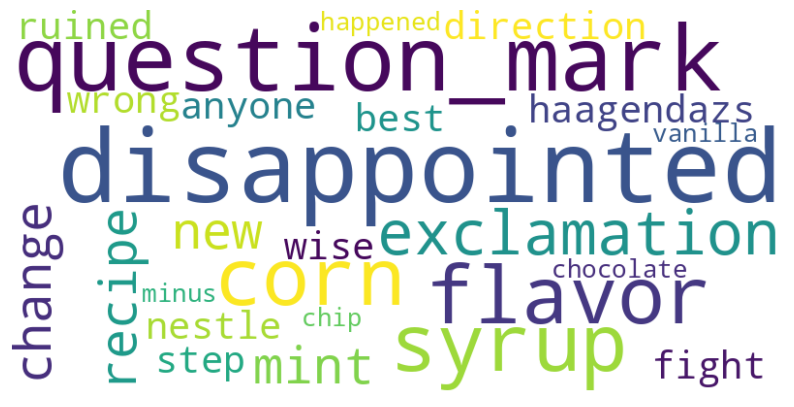

In [ ]:
all_text = ' '.join(most_helpful['title_processed'].apply(lambda tokens: ' '.join(tokens)))

# Generate WordCloud for the titles in most_helpful
most_helpful_wc = WordCloud(width=800, height=400, background_color='white', max_words = 25).generate(all_text)

# Display the generated word cloud using matplotlib
plt.figure(figsize=(10, 8))
plt.imshow(most_helpful_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

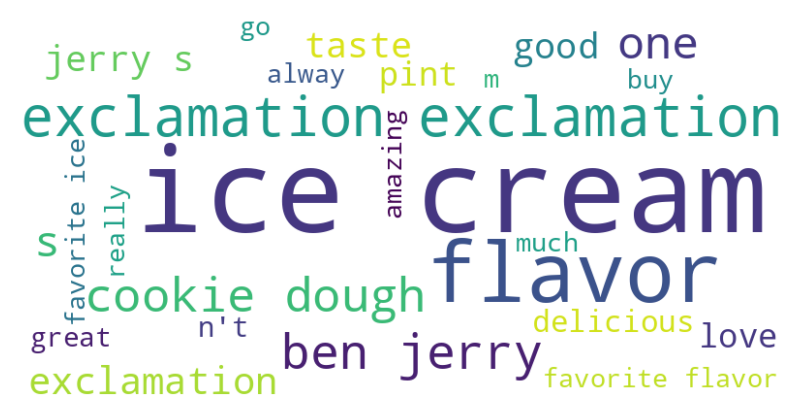

In [ ]:
bj_text = ' '.join(reviews[reviews["brand"] == "bj"]['text_processed'].apply(lambda tokens: ' '.join(tokens)))

# Generate WordCloud
bj_wc = WordCloud(width=800, height=400, background_color='white', max_words = 25).generate(bj_text)

# Display the generated word cloud using matplotlib
plt.figure(figsize=(10, 8))
plt.imshow(bj_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

# Sentiment Analysis

In [ ]:
! wget https://raw.githubusercontent.com/clairemai02/data144/main/vader_lexicon.txt
sent = pd.read_csv('vader_lexicon.txt', sep='\t', header=None)[[0, 1]].rename(columns={0: 'token', 1: 'polarity'}).set_index('token')
sent.head()

--2023-12-06 01:59:55--  https://raw.githubusercontent.com/clairemai02/data144/main/vader_lexicon.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 426631 (417K) [text/plain]
Saving to: ‘vader_lexicon.txt’

vader_lexicon.txt   100%[===================>] 416.63K  --.-KB/s    in 0.05s   

2023-12-06 01:59:55 (8.55 MB/s) - ‘vader_lexicon.txt’ saved [426631/426631]



,polarity
token,
$:,-1.5
%),-0.4
%-),-1.5
&-:,-0.4
&:,-0.7


In [ ]:
punct_re = r'[^\w\s]'
reviews["clean_text"] = reviews['text'].str.lower().replace(punct_re, ' ', regex=True)
reviews["clean_title"] = reviews['title'].str.lower().replace(punct_re, ' ', regex=True)
text_words = reviews["clean_text"].str.split().explode().to_frame().rename(columns={"clean_text": "text_word"})
title_words = reviews["clean_title"].str.split().explode().to_frame().rename(columns={"clean_title": "title_word"})
reviews["polarity_text"] = text_words.merge(sent, how='left', left_on='text_word', right_index=True).reset_index() \
        .loc[:, ['index', 'polarity']].groupby('index').sum().fillna(0)
reviews["polarity_title"] = title_words.merge(sent, how='left', left_on='title_word', right_index=True).reset_index() \
        .loc[:, ['index', 'polarity']].groupby('index').sum().fillna(0)

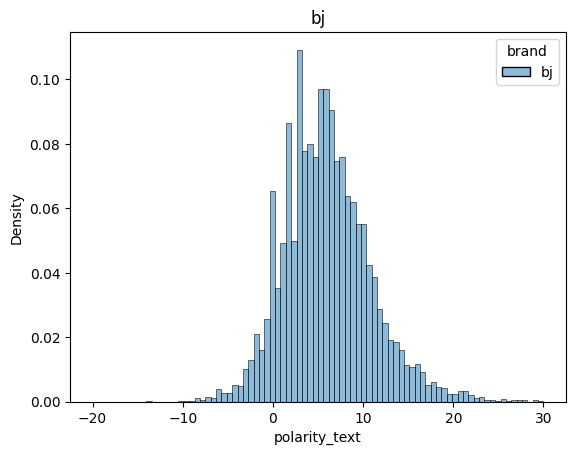

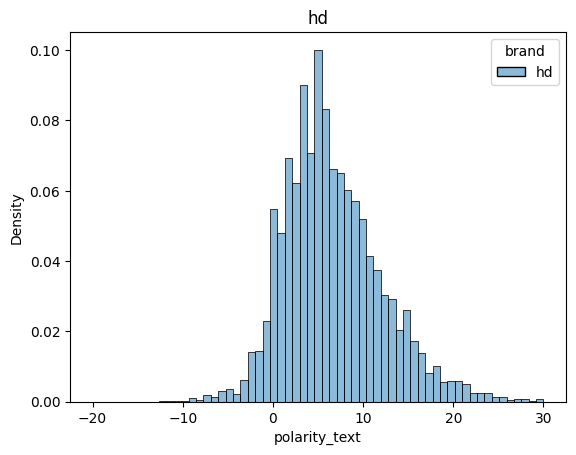

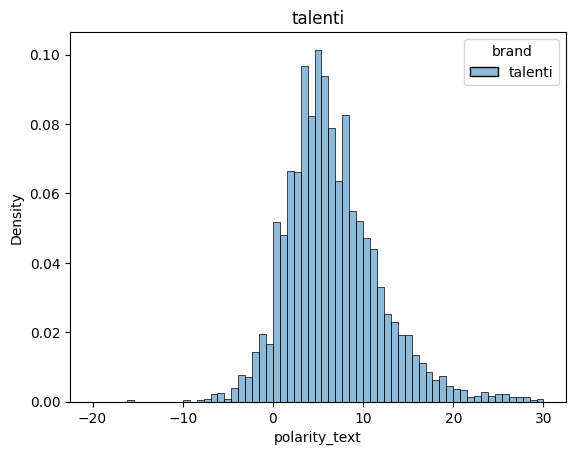

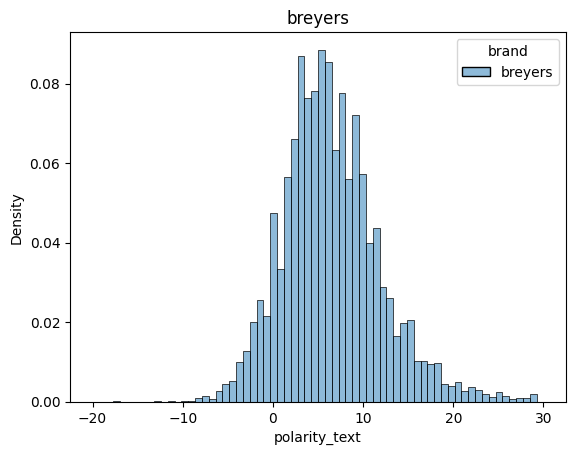

In [ ]:
for b in reviews['brand'].unique():
  sns.histplot(data=reviews[(reviews['polarity_text'] <= 40) & (reviews['brand'] == b)],
               x='polarity_text', hue='brand', stat='density', binrange=(-20, 30))
  plt.title(b)
  plt.show()

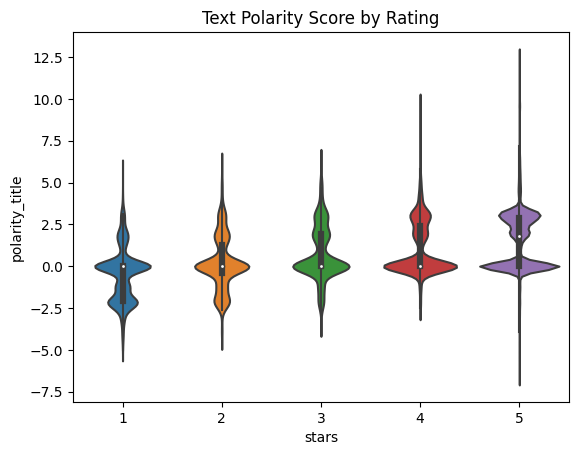

In [ ]:
# plt.scatter(reviews)
# plt.scatter(reviews['polarity_text'], reviews['polarity_title']);
sns.violinplot(data=reviews, x='stars', y='polarity_title')
plt.title('Text Polarity Score by Rating');

In [ ]:
reviews

,brand,key,author,date,stars,title,helpful_yes,helpful_no,text,title_processed,text_processed,clean_text,clean_title,polarity_text,polarity_title
0,bj,0_bj,Ilovebennjerry,2017-04-15,3,Not enough brownies!,10.0,3.0,"Super good, don't get me wrong. But I came for...","[not, enough, brownies, exclamation]","[super, good, do, n't, get, wrong, but, came, ...",super good don t get me wrong but i came for...,not enough brownies,25.5,0.0
1,bj,0_bj,Sweettooth909,2020-01-05,5,I’m OBSESSED with this pint!,3.0,0.0,I decided to try it out although I’m not a hug...,"[’, m, obsessed, with, pint, exclamation]","[decided, to, try, out, although, ’, m, not, h...",i decided to try it out although i m not a hug...,i m obsessed with this pint,10.8,-0.7
2,bj,0_bj,LaTanga71,2018-04-26,3,My favorite...More Caramel Please,5.0,2.0,My caramel core begins to disappear about half...,"[favorite, more, caramel, please]","[caramel, core, begins, to, disappear, about, ...",my caramel core begins to disappear about half...,my favorite more caramel please,8.8,3.3
3,bj,0_bj,chicago220,2018-01-14,5,Obsessed!!!,24.0,1.0,Why are people complaining about the blonde br...,"[obsessed, exclamation, exclamation, exclamation]","[why, are, people, complaining, about, blonde,...",why are people complaining about the blonde br...,obsessed,12.1,-0.7
4,bj,0_bj,Kassidyk,2020-07-24,1,Worst Ice Cream Ever!,1.0,5.0,This ice cream is worst ice cream I’ve ever ta...,"[worst, ice, cream, ever, exclamation]","[ice, cream, worst, ice, cream, ’, ve, ever, t...",this ice cream is worst ice cream i ve ever ta...,worst ice cream ever,-1.6,-3.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21669,breyers,68_breyers,Randi,2020-04-22,1,Terrible missing the chocolate ice cream,0.0,0.0,There was no chocolate ice cream in this at al...,"[terrible, missing, chocolate, ice, cream]","[there, was, no, chocolate, ice, cream, at, al...",there was no chocolate ice cream in this at al...,terrible missing the chocolate ice cream,-1.9,-3.3
21670,breyers,68_breyers,Bethie,2020-09-08,1,Terrible,0.0,0.0,This ice cream has no flavor at all. No one in...,[terrible],"[ice, cream, has, no, flavor, at, all, no, one...",this ice cream has no flavor at all no one in...,terrible,-2.3,-2.1
21671,breyers,68_breyers,Nshaw1994,2020-09-09,5,Flavor of the week!,0.0,0.0,Absolutely love this flavor! The only thing th...,"[flavor, of, week, exclamation]","[absolutely, love, flavor, exclamation, only, ...",absolutely love this flavor the only thing th...,flavor of the week,5.1,0.0
21672,breyers,68_breyers,PamelaG,2020-06-01,5,Love this flavor!!,0.0,0.0,Brilliant combo - love the cheesecake and brow...,"[love, flavor, exclamation, exclamation]","[brilliant, combo, love, cheesecake, brownie, ...",brilliant combo love the cheesecake and brow...,love this flavor,7.3,3.2


# Ingredient Clustering

In [ ]:
pd.set_option('display.max_colwidth', None)

import gensim
from sklearn.manifold import TSNE

%matplotlib inline
from seaborn import scatterplot
import matplotlib.pyplot as plt

In [ ]:
bj = products[products['brand'] == "bj"]
hd = products[products['brand'] == "hd"]
talenti = products[products['brand'] == "talenti"]
breyers = products[products['brand'] == "breyers"]

In [ ]:
def flavor_tokenized(brand, col_name): # ex brand = talenti, col_name = "name"
  tokenized = brand[col_name].apply(lambda x : word_tokenize(x.lower())) # a series
  stopword = ["&", "and", "a", "with", ",", "of", "'s", '®', '!', '.', '10ct', '2in1', "added"]
  ingredients = tokenized.apply(lambda x : [word for word in x if word not in stopword])
  df = pd.DataFrame(ingredients).rename(columns = {col_name: "tokenized ingredients"})
  df.insert(0, "brand", brand["brand"])
  return df

In [ ]:
bj_token = flavor_tokenized(bj, "subhead")
hd_token = flavor_tokenized(hd, "name")
talenti_token = flavor_tokenized(talenti, "name")
breyers_token = flavor_tokenized(breyers, "name")

In [ ]:
all_ingredients = pd.concat([bj_token, hd_token, talenti_token, breyers_token], axis = 0)
all_ingredients.head()

,brand,tokenized ingredients
0,bj,"[sweet, cream, ice, cream, blonde, brownies, salted, caramel, core]"
1,bj,"[peanut, butter, ice, cream, sweet, salty, pretzel, swirls, fudge, brownies]"
2,bj,"[cold, mess, chocolate, ice, cream, fudge, chips, crunchy, potato, chip, swirls]"
3,bj,"[mascarpone, ice, cream, fudge-covered, pastry, shell, pieces, mascarpone, swirls]"
4,bj,"[toasted, marshmallow, ice, cream, chocolate, cookie, swirls, graham, cracker, swirls, fudge, flakes]"


## OHE for clustering

In [ ]:
ohe_df = pd.concat([all_ingredients, pd.get_dummies(all_ingredients['tokenized ingredients'].explode()).groupby(level=0).sum()], axis=1)
ohe_df.head()

,brand,tokenized ingredients,ahoy,almond,almonds,alphonso,apple,bake,banana,bar,...,truffles,twirl,universe,vanilla,waffle,walnuts,whiskey,white,world,york
0,bj,"[sweet, cream, ice, cream, blonde, brownies, salted, caramel, core]",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,bj,"[peanut, butter, ice, cream, sweet, salty, pretzel, swirls, fudge, brownies]",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,bj,"[cold, mess, chocolate, ice, cream, fudge, chips, crunchy, potato, chip, swirls]",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,bj,"[mascarpone, ice, cream, fudge-covered, pastry, shell, pieces, mascarpone, swirls]",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,bj,"[toasted, marshmallow, ice, cream, chocolate, cookie, swirls, graham, cracker, swirls, fudge, flakes]",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
X_ohe = ohe_df.iloc[:, 2:]
my_range = range(2,11)
my_inertias = []
labels = []
centers = []
for k in my_range:
  my_clusters = KMeans(n_clusters=k, random_state = 42, n_init = "auto")
  my_clusters.fit_predict(X_ohe)
  centers.append(my_clusters.cluster_centers_)
  labels.append(my_clusters.labels_)
  my_inertias.append(my_clusters.inertia_)

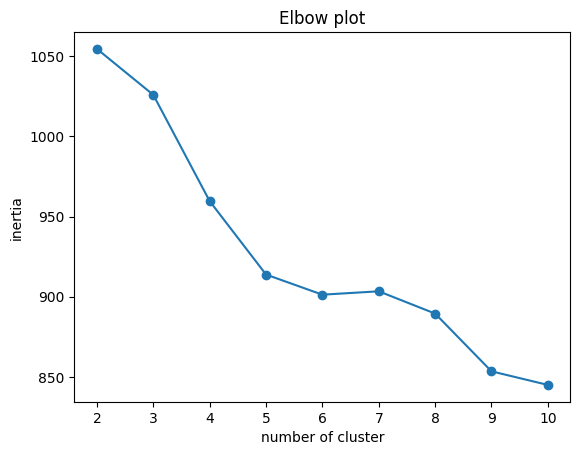

In [ ]:
plt.plot(my_range, my_inertias)
plt.scatter(my_range, my_inertias)
plt.title("Elbow plot")
plt.xlabel("number of cluster")
plt.ylabel("inertia")
plt.xticks(my_range);

In [ ]:
ohe_kmeans = KMeans(n_clusters=5, random_state = 42, n_init = "auto")
ohe_kmeans.fit(X_ohe)
labels = ohe_kmeans.labels_
ohe_df["cluster"] = labels

In [ ]:
tsne = TSNE(n_components=2, verbose=1, random_state=1)
tsne_drop_columns = ['brand','tokenized ingredients']
tsne_results = tsne.fit_transform(X=ohe_df.drop(columns=tsne_drop_columns).values)
tsne_plot_df = pd.DataFrame(data={'cluster': ohe_df['cluster'], 'x': tsne_results[:, 0], 'y': tsne_results[:, 1]})
tsne_plot_df.head()

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 241 samples in 0.001s...
[t-SNE] Computed neighbors for 241 samples in 0.059s...
[t-SNE] Computed conditional probabilities for sample 241 / 241
[t-SNE] Mean sigma: 0.937920
[t-SNE] KL divergence after 250 iterations with early exaggeration: 61.962997
[t-SNE] KL divergence after 1000 iterations: 0.590847


,cluster,x,y
0,2,-7.320959,-7.514224
1,2,-2.014899,-13.337340
2,3,-3.167430,-15.900331
3,2,-2.560480,-7.827776
4,3,-6.659973,-20.190716


<Axes: xlabel='x', ylabel='y'>

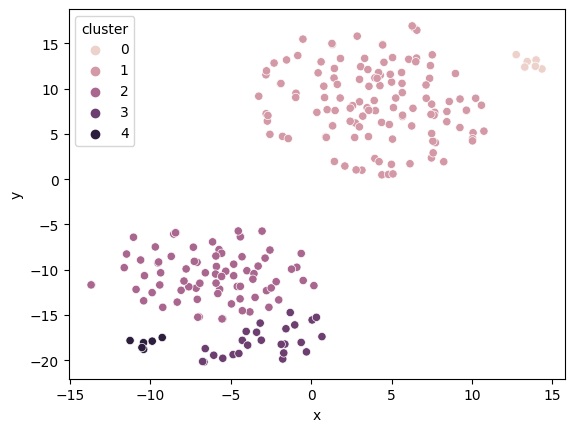

In [ ]:
scatterplot(data=tsne_plot_df, x='x', y='y', hue='cluster')

## Training word2vec embeddings for clustering

In [ ]:
tokens_list = [row for row in all_ingredients["tokenized ingredients"]]

In [ ]:
model = gensim.models.Word2Vec(tokens_list, min_count = 1, vector_size = 16, window=3)

In [ ]:
print(f'Corpus Size: {model.corpus_total_words}')
print(f'Corpus Count: {model.corpus_count}')
print(f'Training time: {model.total_train_time}')
print(f'Sample words: {list(model.wv.index_to_key[:10])}')

Corpus Size: 1254
Corpus Count: 241
Training time: 0.004835437000011211
Sample words: ['ice', 'cream', 'chocolate', 'vanilla', 'fudge', 'caramel', 'cookie', 'butter', 'gelato', 'peanut']


In [ ]:
unique_words = list(set([item for sublist in tokens_list for item in sublist]))
vector_list = model.wv[unique_words]

In [ ]:
X = np.array(vector_list)

kmeans = KMeans(n_clusters = 4, random_state = 42, n_init='auto')
kmeans.fit(X)

centers = kmeans.cluster_centers_

cluster1 = model.wv.similar_by_vector(centers[0], topn = 5)
cluster2 = model.wv.similar_by_vector(centers[1], topn = 5)
cluster3 = model.wv.similar_by_vector(centers[2], topn = 5)
cluster4 = model.wv.similar_by_vector(centers[3], topn = 5)

print(cluster1)
print(cluster2)
print(cluster3)
print(cluster4)

labels = kmeans.labels_

[('cookies', 0.8196370005607605), ('double', 0.6661658883094788), ('cherry', 0.6465690732002258), ('soft', 0.6431758999824524), ('cookie', 0.5701228380203247)]
[('fish', 0.751014769077301), ('reese', 0.6901972889900208), ('raspberry', 0.6526608467102051), ('oatmeal', 0.6116639375686646), ('milk', 0.5790650844573975)]
[('pretzels', 0.6809371113777161), ('peanut', 0.593730628490448), ('pretzel', 0.5696712136268616), ('cups', 0.5441846251487732), ('black', 0.5375156998634338)]
[('collision', 0.7086321115493774), ('chips', 0.6994082927703857), ('waffle', 0.6399163007736206), ('sea', 0.639685869216919), ('thick', 0.6188865303993225)]


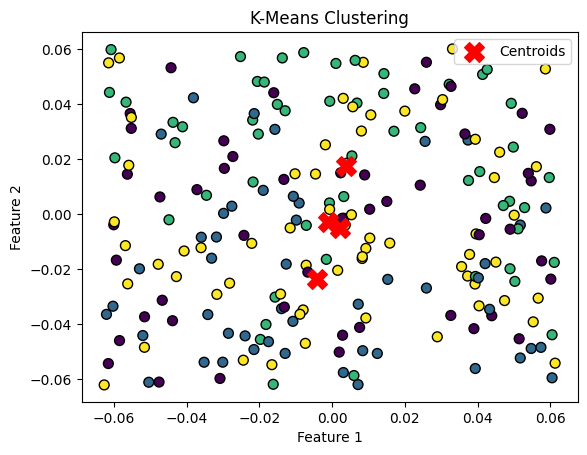

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', edgecolors='k', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='X', s=200, c='red', label='Centroids')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-Means Clustering')
plt.legend()
plt.show()

In [ ]:
data_embed = TSNE(n_components=2, perplexity=100, verbose=2, method='exact').fit_transform(vector_list)

[t-SNE] Computing pairwise distances...
[t-SNE] Computed conditional probabilities for sample 217 / 217
[t-SNE] Mean sigma: 0.088583
[t-SNE] Iteration 50: error = 39.9529718, gradient norm = 0.1907843 (50 iterations in 0.123s)
[t-SNE] Iteration 100: error = 40.5175021, gradient norm = 0.1631722 (50 iterations in 0.144s)
[t-SNE] Iteration 150: error = 39.3479788, gradient norm = 0.2318873 (50 iterations in 0.130s)
[t-SNE] Iteration 200: error = 40.1711785, gradient norm = 0.1379395 (50 iterations in 0.136s)
[t-SNE] Iteration 250: error = 38.8823730, gradient norm = 0.1398022 (50 iterations in 0.130s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 38.882373
[t-SNE] Iteration 300: error = 0.5655129, gradient norm = 0.0032116 (50 iterations in 0.135s)
[t-SNE] Iteration 350: error = 0.5573796, gradient norm = 0.0006170 (50 iterations in 0.131s)
[t-SNE] Iteration 400: error = 0.5573101, gradient norm = 0.0000216 (50 iterations in 0.131s)
[t-SNE] Iteration 450: error = 0.

In [ ]:
df = pd.DataFrame(data_embed[:,:2],columns=["x","y"])
df['Feature 1'] = unique_words
df['Feature 2'] = kmeans.labels_
df.head()

,x,y,Feature 1,Feature 2
0,0.484802,0.123929,new,1
1,0.392328,0.934521,sea,3
2,1.251457,-1.522635,bean,0
3,-0.864704,0.708390,malt,2
4,0.334300,-1.956874,mascarpone,1


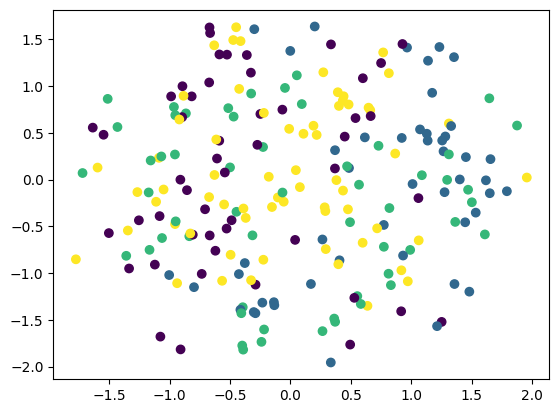

In [ ]:
plt.scatter(df["x"], df["y"], c = df["Feature 2"], cmap='viridis')

### full product name used in word2vec vocab

In [ ]:
bj_name = [[x] for x in bj["subhead"]]
hd_name = [[x] for x in hd["name"]]
talenti_name = [[x] for x in talenti['name']]
breyers_name = [[x] for x in breyers['name']]

all_names = [bj_name, hd_name, talenti_name, breyers_name]
product_list = []
for n in all_names:
  product_list.extend(n)

# product_names = [[x] for x in products['ingredients']]
# product_names = [product_names]
# product_list = []
# for n in product_names:
#   product_list.extend(n)


In [ ]:
fullmodel = gensim.models.Word2Vec(product_list, min_count = 1, vector_size = 16, window=3)

In [ ]:
print(f'Corpus Size: {fullmodel.corpus_total_words}')
print(f'Corpus Count: {fullmodel.corpus_count}')
print(f'Training time: {fullmodel.total_train_time}')
print(f'Sample words: {list(fullmodel.wv.index_to_key[:10])}')

Corpus Size: 241
Corpus Count: 241
Training time: 0.0019905900000054544
Sample words: ['Vanilla Ice Cream', 'Layered Dessert Brownie Cheesecake', 'Coconut Caramel Non-Dairy', 'Green Tea Ice Cream', 'Dulce de Leche Ice Cream', 'Dulce de Leche Cookie Squares', 'Double Belgian Chocolate Chip Ice Cream', 'Cookies and Cream Ice Cream', 'Cold Brew Espresso Chip HEAVEN Light Ice Cream', 'Coffee Vanilla Chocolate TRIO CRISPY LAYERS']


In [ ]:
unique_words = list(set([item for sublist in product_list for item in sublist]))
vector_list = fullmodel.wv[unique_words]

In [ ]:
from sklearn.cluster import KMeans

X = np.array(vector_list)

kmeans = KMeans(n_clusters = 4, random_state = 42, n_init='auto')
kmeans.fit(X)

centers = kmeans.cluster_centers_

cluster1 = fullmodel.wv.similar_by_vector(centers[0], topn = 5)
cluster2 = fullmodel.wv.similar_by_vector(centers[1], topn = 5)
cluster3 = fullmodel.wv.similar_by_vector(centers[2], topn = 5)
cluster4 = fullmodel.wv.similar_by_vector(centers[3], topn = 5)

print(cluster1)
print(cluster2)
print(cluster3)
print(cluster4)

labels = kmeans.labels_

[('Raspberry Cheesecake Gelato Indulgences', 0.6657468676567078), ('Layered Dessert Peach Cobbler', 0.6622689366340637), ('Chocolate Snack Cups 10ct', 0.6418178081512451), ('Vanilla Chocolate Strawberry', 0.6162039041519165), ('Vanilla Cookie Squares', 0.6038740277290344)]
[('Blackberry & Mascarpone Ice Creams with Shortbread Cookies & Fudge-Covered Almonds', 0.7638417482376099), ('Dulce de Leche Cookie Squares', 0.7413209676742554), ('COCONUT ALMOND CHOCOLATE GELATO', 0.6204547882080078), ('Chocolate', 0.5794364213943481), ('Butter Pecan', 0.5694290399551392)]
[('Rosé & Cream Ice Cream', 0.6840105652809143), ('Caramel Cheesecake Ice Cream with Cheesecake Pieces & Chocolate Cookie Swirls', 0.6121032238006592), ('Vanilla Ice Cream with Fudge-Covered Waffle Cone Pieces & a Caramel Swirl', 0.6104402542114258), ('Chocolate Ice Cream with Chocolate Cookies & Swirls of Chocolate Pudding Ice Cream', 0.6009765267372131), ('Mango Sorbet', 0.5329405665397644)]
[('Vanilla Ice Cream with a Chocola

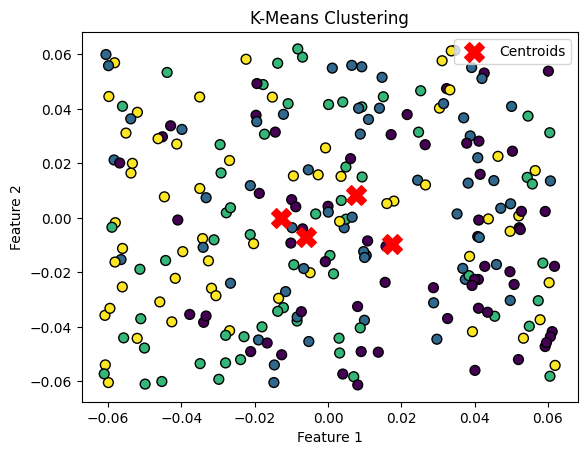

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', edgecolors='k', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='X', s=200, c='red', label='Centroids')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-Means Clustering')
plt.legend()
plt.show()

In [ ]:
data_embed = TSNE(n_components=2, perplexity=100, verbose=2, method='exact').fit_transform(vector_list)

[t-SNE] Computing pairwise distances...
[t-SNE] Computed conditional probabilities for sample 240 / 240
[t-SNE] Mean sigma: 0.084989
[t-SNE] Iteration 50: error = 39.8282214, gradient norm = 0.1063966 (50 iterations in 0.153s)
[t-SNE] Iteration 100: error = 39.8970075, gradient norm = 0.1154472 (50 iterations in 0.155s)
[t-SNE] Iteration 150: error = 40.2478832, gradient norm = 0.1128664 (50 iterations in 0.142s)
[t-SNE] Iteration 200: error = 39.8698105, gradient norm = 0.1260937 (50 iterations in 0.155s)
[t-SNE] Iteration 250: error = 39.7667854, gradient norm = 0.1027501 (50 iterations in 0.189s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 39.766785
[t-SNE] Iteration 300: error = 0.6480952, gradient norm = 0.0038410 (50 iterations in 0.195s)
[t-SNE] Iteration 350: error = 0.6369986, gradient norm = 0.0001837 (50 iterations in 0.215s)
[t-SNE] Iteration 400: error = 0.6369906, gradient norm = 0.0000027 (50 iterations in 0.180s)
[t-SNE] Iteration 450: error = 0.

In [ ]:
df = pd.DataFrame(data_embed[:,:2],columns=["x","y"])
df['Feature 1'] = unique_words
df['Feature 2'] = kmeans.labels_
df.head()

,x,y,Feature 1,Feature 2
0,0.379681,-1.699387,Vanilla Soft Dipped Ice Cream Bar,3
1,0.510173,-1.552028,Chocolate & Vanilla Ice Creams with Fudge Brownies & a Brownie Batter Core,0
2,0.128893,-0.232140,MADAGASCAN VANILLA BEAN GELATO,1
3,1.258824,1.722640,Pistachio Ice Cream,0
4,0.496591,0.471578,PEPPERMINT BARK GELATO,0


In [ ]:
df[df["Feature 2"] == 3]

,x,y,Feature 1,Feature 2
0,0.379681,-1.699387,Vanilla Soft Dipped Ice Cream Bar,3
5,-0.322818,1.658080,PEANUT BUTTER FUDGE SORBETTO,3
13,0.547531,-0.812475,Vanilla Ice Cream with Chocolate Sandwich Cookies & Chocolate Cookie Swirls,3
19,0.333833,1.785355,REESE'S Chocolate,3
24,-1.032143,-1.733587,Chocolate Truffle,3
25,-0.929224,1.751049,Coconut Caramel Dark Chocolate Non-Dairy Bar,3
32,-0.594659,1.196181,Black Raspberry Chocolate,3
34,-0.811849,1.104474,Ice Cream Cake,3
40,0.024045,-1.159700,Peanut Butter Ice Cream with Peanut Butter Cups,3
60,-0.710743,1.198000,Cold Brew Coffee Ice Cream with Chocolate Cookie-Covered Coffee Liqueur Truffles & Fudge Swirls,3


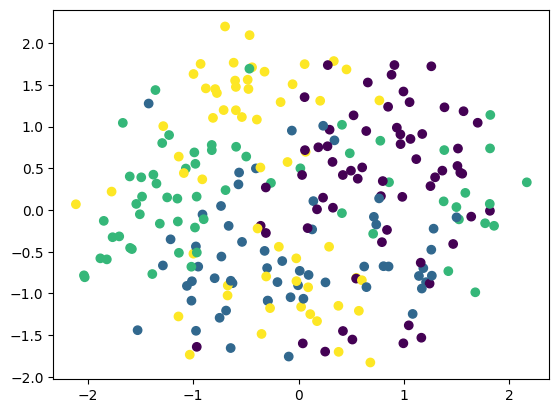

In [ ]:
plt.scatter(df["x"], df["y"], c = df["Feature 2"], cmap='viridis')

## Final Clustering/Sentiment Analysis Pipeline


In [ ]:
merged = reviews.merge(products, left_on='key', right_on='key').drop(['brand_y'], axis=1)

In [ ]:
def find_name(row):
  if row['brand_x'] == 'bj':
    return row['subhead']
  else:
    return row['name']

In [ ]:
merged['final_name'] = merged.apply(find_name, axis=1)
merged

,brand_x,key,author,date,stars,title,helpful_yes,helpful_no,text,title_processed,...,clean_title,polarity_text,polarity_title,name,subhead,description,rating,rating_count,ingredients,final_name
0,bj,0_bj,Ilovebennjerry,2017-04-15,3,Not enough brownies!,10.0,3.0,"Super good, don't get me wrong. But I came for the caramel and brownies, not the sweet cream. The packaging made it seem like brownies were packed and bountiful *crying frowny emoji* I'd say the taste of this was amazing, but the ratio of brownie to sweet cream was disappointing. Liked it regardless but probably won't buy again simply because it didn't live up to its promising package. I'll find another one that has a better ratio and wayyy more yummy chewy brownies.\nOverall, good flavor, texture, idea, and brownies. Not so great caramel/sweet cream/ brownie RATIO. Just add more brownies. Please.","[not, enough, brownies, exclamation]",...,not enough brownies,25.5,0.0,Salted Caramel Core,Sweet Cream Ice Cream with Blonde Brownies & a Salted Caramel Core,"Find your way to the ultimate ice cream experience with our Cores. Whether your primal urges lead you to the center of salted caramel or directly to the blonde brownies, you’ll be in total control of your own ice cream destiny.",3.7,208,"CREAM, SKIM MILK, LIQUID SUGAR (SUGAR, WATER), WATER, BROWN SUGAR, SUGAR, MILK, WHEAT FLOUR, EGG YOLKS, CORN SYRUP, EGGS, BUTTER (CREAM, SALT), BUTTEROIL, PECTIN, SEA SALT, SOYBEAN OIL, VANILLA EXTRACT, GUAR GUM, SOY LECITHIN, BAKING POWDER (SODIUM ACID PYROPHOSPHATE, SODIUM BICARBONATE, CORN STARCH, MONOCALCIUM PHOSPHATE), BAKING SODA, SALT, CARRAGEENAN, LACTASE",Sweet Cream Ice Cream with Blonde Brownies & a Salted Caramel Core
1,bj,0_bj,Sweettooth909,2020-01-05,5,I’m OBSESSED with this pint!,3.0,0.0,"I decided to try it out although I’m not a huge caramel fan, and the first buy was ok, didn’t like the caramel too much and for some reason that specific pint barely had any brownies! Like there were some on top but from the middle to the bottom? Zilch. Nada. Nothing! It was disappointing. But for some reason, I bought it again and I really do believe it was just that point bcuz the second one was glorious!! I had a big brownie chunk in EVERY bite. Plus the caramel didn’t bother me as much and I took a liking to it. Conclusion: I’m on my fifth pint, of the week and I’m going back to get my daily pint cus I’m kinda sick and need some happiness.","[’, m, obsessed, with, pint, exclamation]",...,i m obsessed with this pint,10.8,-0.7,Salted Caramel Core,Sweet Cream Ice Cream with Blonde Brownies & a Salted Caramel Core,"Find your way to the ultimate ice cream experience with our Cores. Whether your primal urges lead you to the center of salted caramel or directly to the blonde brownies, you’ll be in total control of your own ice cream destiny.",3.7,208,"CREAM, SKIM MILK, LIQUID SUGAR (SUGAR, WATER), WATER, BROWN SUGAR, SUGAR, MILK, WHEAT FLOUR, EGG YOLKS, CORN SYRUP, EGGS, BUTTER (CREAM, SALT), BUTTEROIL, PECTIN, SEA SALT, SOYBEAN OIL, VANILLA EXTRACT, GUAR GUM, SOY LECITHIN, BAKING POWDER (SODIUM ACID PYROPHOSPHATE, SODIUM BICARBONATE, CORN STARCH, MONOCALCIUM PHOSPHATE), BAKING SODA, SALT, CARRAGEENAN, LACTASE",Sweet Cream Ice Cream with Blonde Brownies & a Salted Caramel Core
2,bj,0_bj,LaTanga71,2018-04-26,3,My favorite...More Caramel Please,5.0,2.0,"My caramel core begins to disappear about half way through. I only buy this for the caramel core. The first time I purchased this I was not even aware that there were blonde bits in there. You had me a salted caramel core, well this is the fourth pint that I have purchased and the caramel is plentiful at the top then it begins to get sparse about half way down at 3/4s of the way down its gone. It works out in my husbands favor because he doesn't care for the caramel so he gets to finish my pint while having a full pint of his choice. Please please please, its called salted caramel core for a reason. Let the caramel flow through the core. P.S

In [ ]:
combined = merged.merge(df, left_on='final_name', right_on='Feature 1')
combined

,brand_x,key,author,date,stars,title,helpful_yes,helpful_no,text,title_processed,...,subhead,description,rating,rating_count,ingredients,final_name,x,y,Feature 1,Feature 2
0,bj,0_bj,Ilovebennjerry,2017-04-15,3,Not enough brownies!,10.0,3.0,"Super good, don't get me wrong. But I came for the caramel and brownies, not the sweet cream. The packaging made it seem like brownies were packed and bountiful *crying frowny emoji* I'd say the taste of this was amazing, but the ratio of brownie to sweet cream was disappointing. Liked it regardless but probably won't buy again simply because it didn't live up to its promising package. I'll find another one that has a better ratio and wayyy more yummy chewy brownies.\nOverall, good flavor, texture, idea, and brownies. Not so great caramel/sweet cream/ brownie RATIO. Just add more brownies. Please.","[not, enough, brownies, exclamation]",...,Sweet Cream Ice Cream with Blonde Brownies & a Salted Caramel Core,"Find your way to the ultimate ice cream experience with our Cores. Whether your primal urges lead you to the center of salted caramel or directly to the blonde brownies, you’ll be in total control of your own ice cream destiny.",3.7,208,"CREAM, SKIM MILK, LIQUID SUGAR (SUGAR, WATER), WATER, BROWN SUGAR, SUGAR, MILK, WHEAT FLOUR, EGG YOLKS, CORN SYRUP, EGGS, BUTTER (CREAM, SALT), BUTTEROIL, PECTIN, SEA SALT, SOYBEAN OIL, VANILLA EXTRACT, GUAR GUM, SOY LECITHIN, BAKING POWDER (SODIUM ACID PYROPHOSPHATE, SODIUM BICARBONATE, CORN STARCH, MONOCALCIUM PHOSPHATE), BAKING SODA, SALT, CARRAGEENAN, LACTASE",Sweet Cream Ice Cream with Blonde Brownies & a Salted Caramel Core,0.775368,0.830472,Sweet Cream Ice Cream with Blonde Brownies & a Salted Caramel Core,2
1,bj,0_bj,Sweettooth909,2020-01-05,5,I’m OBSESSED with this pint!,3.0,0.0,"I decided to try it out although I’m not a huge caramel fan, and the first buy was ok, didn’t like the caramel too much and for some reason that specific pint barely had any brownies! Like there were some on top but from the middle to the bottom? Zilch. Nada. Nothing! It was disappointing. But for some reason, I bought it again and I really do believe it was just that point bcuz the second one was glorious!! I had a big brownie chunk in EVERY bite. Plus the caramel didn’t bother me as much and I took a liking to it. Conclusion: I’m on my fifth pint, of the week and I’m going back to get my daily pint cus I’m kinda sick and need some happiness.","[’, m, obsessed, with, pint, exclamation]",...,Sweet Cream Ice Cream with Blonde Brownies & a Salted Caramel Core,"Find your way to the ultimate ice cream experience with our Cores. Whether your primal urges lead you to the center of salted caramel or directly to the blonde brownies, you’ll be in total control of your own ice cream destiny.",3.7,208,"CREAM, SKIM MILK, LIQUID SUGAR (SUGAR, WATER), WATER, BROWN SUGAR, SUGAR, MILK, WHEAT FLOUR, EGG YOLKS, CORN SYRUP, EGGS, BUTTER (CREAM, SALT), BUTTEROIL, PECTIN, SEA SALT, SOYBEAN OIL, VANILLA EXTRACT, GUAR GUM, SOY LECITHIN, BAKING POWDER (SODIUM ACID PYROPHOSPHATE, SODIUM BICARBONATE, CORN STARCH, MONOCALCIUM PHOSPHATE), BAKING SODA, SALT, CARRAGEENAN, LACTASE",Sweet Cream Ice Cream with Blonde Brownies & a Salted Caramel Core,0.775368,0.830472,Sweet Cream Ice Cream with Blonde Brownies & a Salted Caramel Core,2
2,bj,0_bj,LaTanga71,2018-04-26,3,My favorite...More Caramel Please,5.0,2.0,"My caramel core begins to disappear about half way through. I only buy this for the caramel core. The first time I purchased this I was not even aware that there were blonde bits in there. You had me a salted caramel core, well this is the fourth pint that I have purchased and the caramel is plentiful at the top then it begins to get sparse about half way down at 3/4s of the way down its gone. It works out in my husbands favor because he doesn't care for the caramel so he gets to finish my pint while having a full pint of his choice. Please please please, its called salted caramel core for a reaso

In [ ]:
def flavor_tokenized(row):
  tokenized = word_tokenize(row["final_name"].lower())
  stopword = ["&", "and", "a", "with", ",", "of", "'s", '®', '!', '.', '10ct', '2in1', "added"]
  ingredients = [word for word in tokenized if word not in stopword]
  return ingredients

In [ ]:
combined['tokenized ingredients'] = combined.apply(flavor_tokenized, axis=1)
combined

,brand_x,key,author,date,stars,title,helpful_yes,helpful_no,text,title_processed,...,description,rating,rating_count,ingredients,final_name,x,y,Feature 1,Feature 2,tokenized ingredients
0,bj,0_bj,Ilovebennjerry,2017-04-15,3,Not enough brownies!,10.0,3.0,"Super good, don't get me wrong. But I came for the caramel and brownies, not the sweet cream. The packaging made it seem like brownies were packed and bountiful *crying frowny emoji* I'd say the taste of this was amazing, but the ratio of brownie to sweet cream was disappointing. Liked it regardless but probably won't buy again simply because it didn't live up to its promising package. I'll find another one that has a better ratio and wayyy more yummy chewy brownies.\nOverall, good flavor, texture, idea, and brownies. Not so great caramel/sweet cream/ brownie RATIO. Just add more brownies. Please.","[not, enough, brownies, exclamation]",...,"Find your way to the ultimate ice cream experience with our Cores. Whether your primal urges lead you to the center of salted caramel or directly to the blonde brownies, you’ll be in total control of your own ice cream destiny.",3.7,208,"CREAM, SKIM MILK, LIQUID SUGAR (SUGAR, WATER), WATER, BROWN SUGAR, SUGAR, MILK, WHEAT FLOUR, EGG YOLKS, CORN SYRUP, EGGS, BUTTER (CREAM, SALT), BUTTEROIL, PECTIN, SEA SALT, SOYBEAN OIL, VANILLA EXTRACT, GUAR GUM, SOY LECITHIN, BAKING POWDER (SODIUM ACID PYROPHOSPHATE, SODIUM BICARBONATE, CORN STARCH, MONOCALCIUM PHOSPHATE), BAKING SODA, SALT, CARRAGEENAN, LACTASE",Sweet Cream Ice Cream with Blonde Brownies & a Salted Caramel Core,0.775368,0.830472,Sweet Cream Ice Cream with Blonde Brownies & a Salted Caramel Core,2,"[sweet, cream, ice, cream, blonde, brownies, salted, caramel, core]"
1,bj,0_bj,Sweettooth909,2020-01-05,5,I’m OBSESSED with this pint!,3.0,0.0,"I decided to try it out although I’m not a huge caramel fan, and the first buy was ok, didn’t like the caramel too much and for some reason that specific pint barely had any brownies! Like there were some on top but from the middle to the bottom? Zilch. Nada. Nothing! It was disappointing. But for some reason, I bought it again and I really do believe it was just that point bcuz the second one was glorious!! I had a big brownie chunk in EVERY bite. Plus the caramel didn’t bother me as much and I took a liking to it. Conclusion: I’m on my fifth pint, of the week and I’m going back to get my daily pint cus I’m kinda sick and need some happiness.","[’, m, obsessed, with, pint, exclamation]",...,"Find your way to the ultimate ice cream experience with our Cores. Whether your primal urges lead you to the center of salted caramel or directly to the blonde brownies, you’ll be in total control of your own ice cream destiny.",3.7,208,"CREAM, SKIM MILK, LIQUID SUGAR (SUGAR, WATER), WATER, BROWN SUGAR, SUGAR, MILK, WHEAT FLOUR, EGG YOLKS, CORN SYRUP, EGGS, BUTTER (CREAM, SALT), BUTTEROIL, PECTIN, SEA SALT, SOYBEAN OIL, VANILLA EXTRACT, GUAR GUM, SOY LECITHIN, BAKING POWDER (SODIUM ACID PYROPHOSPHATE, SODIUM BICARBONATE, CORN STARCH, MONOCALCIUM PHOSPHATE), BAKING SODA, SALT, CARRAGEENAN, LACTASE",Sweet Cream Ice Cream with Blonde Brownies & a Salted Caramel Core,0.775368,0.830472,Sweet Cream Ice Cream with Blonde Brownies & a Salted Caramel Core,2,"[sweet, cream, ice, cream, blonde, brownies, salted, caramel, core]"
2,bj,0_bj,LaTanga71,2018-04-26,3,My favorite...More Caramel Please,5.0,2.0,"My caramel core begins to disappear about half way through. I only buy this for the caramel core. The first time I purchased this I was not even aware that there were blonde bits in there. You had me a salted caramel core, well this is the fourth pint that I have purchased and the caramel is plentiful at the top then it begins to get sparse about half way down at 3/4s of the way down its gone. It works out in my husbands favor because he doesn't care for the caramel so he gets to finish my pint while having a full pint of his choice. Please please please, its called salted cara

In [ ]:
def determine_similar(rows):
  positives = []
  negatives = []
  recs = []
  small_positive = []
  small_negative = []
  for i in range(len(rows)):
    row = rows.iloc[i]
    word = row['Feature 1']
    total_polarity = row['polarity_title'] + row['polarity_text']
    if row['polarity_title'] > 0 and row['polarity_text'] > 0:
      positives.append(word)
    elif row['polarity_title'] < 0 and row['polarity_text'] < 0:
      negatives.append(word)
    else:
      if total_polarity > 0:
        small_positive.append(word)
      else:
        small_negative.append(word)
  if len(positives) > 0 or len(negatives) > 0:
    item_recs = fullmodel.wv.most_similar(positive=positives, negative=negatives)[:3]
  else:
    item_recs = fullmodel.wv.most_similar(positive=small_positive, negative=small_negative)[:3]
  for (item, score) in item_recs:
    product = combined[combined['Feature 1'] == item].iloc[0]
    rec = [product['key'], product['final_name']]
    recs.append(rec)
  return recs

In [ ]:
recommendations = combined.groupby("author").apply(determine_similar)
recommendations

author
00Topaz                                                                 [[18_breyers, Vanilla Caramel Gelato Indulgences], [39_breyers, CarbSmart™ Fudge Bar], [47_bj, Vanilla Ice Cream]]
00madeline                                                              [[12_breyers, CarbSmart™ Vanilla], [6_talenti, CARAMEL COOKIE CRUNCH GELATO], [41_breyers, OREO® Snack Cups 10ct]]
00misanthrope                                                                     [[49_hd, Rosé & Cream Ice Cream], [7_breyers, Delights Creamy Chocolate], [48_hd, Rocky Road Ice Cream]]
0406             [[13_hd, Chocolate Dark Chocolate Ice Cream Bar], [55_hd, Strawberry Ice Cream], [37_bj, Chocolate Ice Cream with Gooey Marshmallow Swirls, Caramel Swirls & Fudge Fish]]
08620                                                             [[49_hd, Rosé & Cream Ice Cream], [62_hd, Vanilla Blackberry Chocolate TRIO CRISPY LAYERS], [9_hd, Chocolate Ice Cream]]
                                                          

In [ ]:
author_recs = pd.DataFrame(recommendations).rename(columns={0: "recommendations"})
author_recs

,recommendations
author,
00Topaz,"[[18_breyers, Vanilla Caramel Gelato Indulgences], [39_breyers, CarbSmart™ Fudge Bar], [47_bj, Vanilla Ice Cream]]"
00madeline,"[[12_breyers, CarbSmart™ Vanilla], [6_talenti, CARAMEL COOKIE CRUNCH GELATO], [41_breyers, OREO® Snack Cups 10ct]]"
00misanthrope,"[[49_hd, Rosé & Cream Ice Cream], [7_breyers, Delights Creamy Chocolate], [48_hd, Rocky Road Ice Cream]]"
0406,"[[13_hd, Chocolate Dark Chocolate Ice Cream Bar], [55_hd, Strawberry Ice Cream], [37_bj, Chocolate Ice Cream with Gooey Marshmallow Swirls, Caramel Swirls & Fudge Fish]]"
08620,"[[49_hd, Rosé & Cream Ice Cream], [62_hd, Vanilla Blackberry Chocolate TRIO CRISPY LAYERS], [9_hd, Chocolate Ice Cream]]"
...,...
zsarkap,"[[38_breyers, Butter Pecan], [39_breyers, CarbSmart™ Fudge Bar], [17_breyers, Vanilla Caramel]]"
zukhrufnaz,"[[32_talenti, PEANUT BUTTER FUDGE SORBETTO], [8_hd, Cherry Vanilla Ice Cream], [58_breyers, Ice Cream Cake]]"
zurrealcurls,"[[18_breyers, Vanilla Caramel Gelato Indulgences], [18_talenti, DOUBLE DARK CHOCOLATE GELATO], [47_hd, Raspberry Sorbet]]"


**Regression OHE and Analysis**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error
import sklearn

In [ ]:

regression_table = ohe_df.copy().drop(['tokenized ingredients', 'brand', 'cluster'], axis=1)
regression_table_brand = pd.get_dummies(ohe_df.copy().drop(['tokenized ingredients', 'cluster'], axis=1))

#regression_table.concat()
rating_series = products['rating']

regression_table


,ahoy,almond,almonds,alphonso,apple,bake,banana,bar,bark,batter,...,truffles,twirl,universe,vanilla,waffle,walnuts,whiskey,white,world,york
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
237,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
238,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
239,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(regression_table, rating_series, train_size=0.7, random_state=100)

model = LinearRegression()

model.fit(X_train, y_train)

rating_y_pred = model.predict(X_test)
score= model.score(X_test, y_test)
rmse = mean_squared_error(y_test, rating_y_pred, squared=False)

print('R^2 Score:')
print(score)
print("Rmse:")
print(rmse)
print(rating_y_pred)

print(max(model.coef_))

R^2 Score:
-4.2519254528239175e+25
Rmse:
4030479480208.7305
[ 4.24841654e+00 -3.42333560e+05  3.17598505e+13 -1.05851183e+11
  1.09783894e+01  5.30917272e+11  4.51865203e+12  4.43250167e+00
  4.51201975e+00  4.30013835e+00  3.77148020e+00  4.11645090e+00
  5.26510217e+00  5.03892099e+00  3.23688965e+00  3.39709055e+00
  3.96403414e+00  2.86171364e+12 -5.92965668e+11 -3.55390196e+07
  4.80260813e+00  3.30187570e+00  4.43958175e+00  2.65050852e+00
  3.06397901e+12  4.70493662e+00 -2.68881887e+11 -3.25403492e+11
  3.15939676e+00  4.81076920e+00  2.94152414e+00  3.30846750e+00
  3.95641672e+00 -1.31159594e+12  4.00382006e+00  3.21510555e+12
  3.26774508e+00  3.02982695e+11  4.63147628e+00  5.49400405e+00
  5.40284589e+00  2.53018724e+00  4.57921945e+00 -4.99113512e+11
 -3.89661062e+00  4.41808664e+00 -2.91031239e+12 -4.68538893e+00
 -4.55581079e+11  4.06714212e+00  1.17061833e+01  1.00579745e+12
  2.67493331e+00  3.12005929e+10 -1.00579745e+12 -4.52425376e+10
  1.72303400e+12 -3.48799671e+

In [ ]:
l1_model = Lasso(alpha=0.1)
l1_model.fit(X_train, y_train)
score = l1_model.score(X_test, y_test)


l1_rating_y_pred = l1_model.predict(X_test)
rmse_l1 = mean_squared_error(y_test, l1_rating_y_pred, squared=False)



print('R^2 Score:')
print(score)
print("Rmse:")
print(rmse_l1)
print(max(l1_model.coef_))

R^2 Score:
-0.0010183091960773716
Rmse:
0.6184219618244264
0.0


In [ ]:
l2_model = Ridge(alpha=1000.0)
l2_model.fit(X_train, y_train)
score=l2_model.score(X_test, y_test)

l2_rating_y_pred = l2_model.predict(X_test)
rmse_l2 = mean_squared_error(y_test, l2_rating_y_pred, squared=False)


print('R^2 Score:')
print(score)
print("Rmse:")
print(rmse_l2)
print(max(l2_model.coef_))
print((l2_model.coef_))

R^2 Score:
0.0008756616866043565
Rmse:
0.6178366439895568
0.009905240983875102
[ 0.00000000e+00  2.10701968e-03  1.51011282e-03  4.90513167e-04
  5.86664676e-04  0.00000000e+00  1.40571018e-03  1.36242192e-03
  1.56482952e-03 -2.44827505e-04 -2.22814844e-04  1.15902482e-03
  0.00000000e+00  2.58225743e-04  4.62800231e-04 -5.16386615e-04
 -7.04490059e-04 -8.19445752e-04 -2.16408507e-04  2.88382627e-04
  2.73508895e-04 -1.06871858e-03 -1.11922338e-03  7.04408197e-05
  0.00000000e+00  4.10890424e-03 -7.04490059e-04  9.95126175e-04
 -9.19066103e-04  0.00000000e+00  3.31333485e-03 -1.14860097e-03
  0.00000000e+00 -1.45748248e-03  7.51665302e-04 -3.86329920e-04
 -4.04221579e-03 -1.94753901e-03  9.90524098e-03  0.00000000e+00
  1.39433316e-03  0.00000000e+00  4.14390534e-04  4.72170930e-04
  2.91500783e-04 -9.94534734e-04  1.80100035e-03 -3.06329691e-03
  7.59768320e-04  0.00000000e+00 -5.55608340e-04  8.05935181e-06
  0.00000000e+00  1.79186621e-03 -1.65511062e-03  4.72170930e-04
  1.1247554